# Plot
Description

In [1]:
# Reload the notebook if an external file is updated
%load_ext autoreload
%autoreload 2

import os
import sys

from pathlib import Path

path = (
    Path
    .cwd()
    .parent
    .parent
    .joinpath('warbler.py')
)

os.chdir(path)
sys.path.append(path)

In [2]:
import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from constant import PROJECTION
from datatype.dataset import Dataset
from datatype.imaging import to_numpy
from datatype.spectrogram import compress
from io import BytesIO
from matplotlib import lines
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from PIL import Image
from scipy.spatial import cKDTree

In [3]:
def get_songtype(name, folder):
    name = (
        name
        .replace('STE', '')
        .replace(f"_{folder}", '')
    )

    if len(name) > 2:
        return name[:2]

    return name

In [4]:
dataset = Dataset('segment')
dataframe = dataset.load()

In [5]:
folder = 'DgDgY_STE2017'

individual = dataframe[dataframe.folder == folder]
individual.reset_index(inplace=True)
individual = individual.copy()

In [6]:
individual['songtype'] = (
    individual['filename']
    .apply(
        lambda x: get_songtype(x, folder)
    )
).astype('uint8')

In [7]:
selection = [
    i.songtype.unique() for _, i in individual.groupby('songtype')
    if i.filename.unique().size > 1
]

selection = (
    np.concatenate(selection)
    .ravel()
    .tolist()
)

selection

[1, 4, 5, 7, 11, 12, 15, 21]

In [8]:
mask = (
    (individual.filename == 'STE05_DgDgY2017') |
    (individual.filename == 'STE18_DgDgY2017')
)

songtype = individual[mask]
songtype.reset_index(inplace=True)
songtype = songtype.copy()

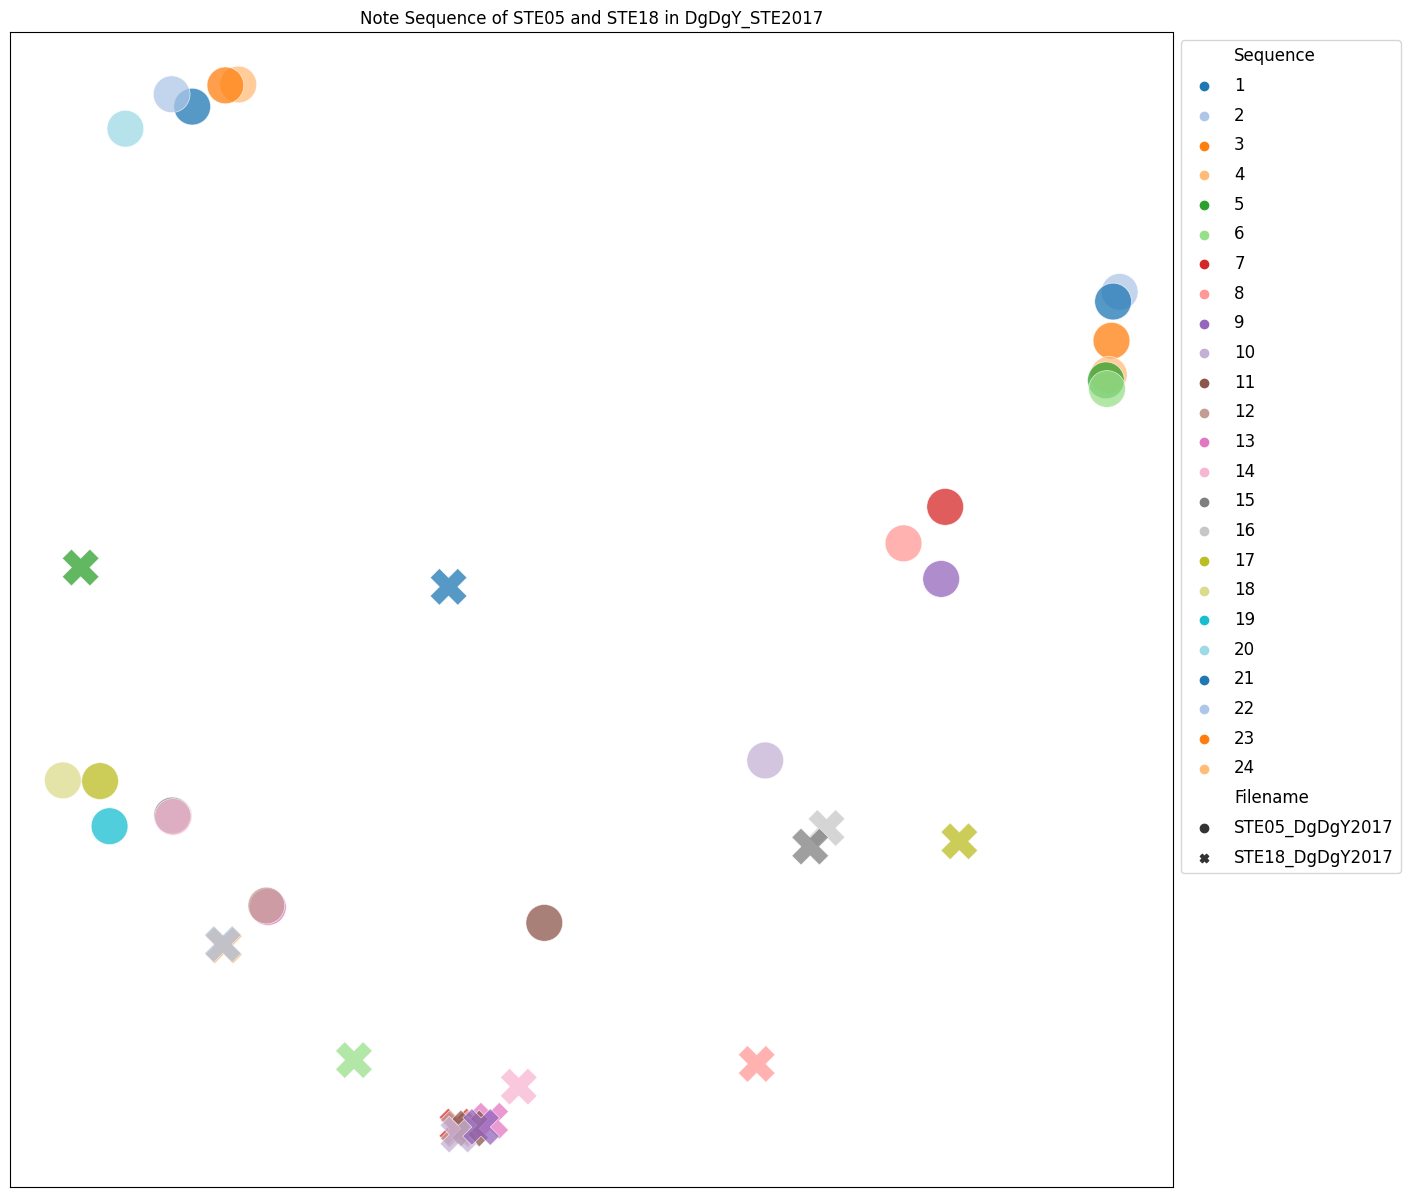

In [9]:
title = f"Note Sequence of STE05 and STE18 in {folder}"

by = ['duration', 'onset']
ascending = [False, False]

songtype.sort_values(
    ascending=ascending,
    by=by,
    inplace=True
)

figsize = (15, 15)
plt.figure(figsize=figsize)

ax = sns.scatterplot(
    songtype, 
    x='umap_x_2d', 
    y='umap_y_2d',
    hue='sequence',
    style='filename',
    alpha=0.75,
    legend='full',
    linewidth=0.5,
    palette='tab20',
    s=700
)

sns.move_legend(
    ax, 
    'upper left', 
    bbox_to_anchor=(1, 1),
    labelspacing=0.7,
    prop={
        'size': 'large'
    }
)

for text in ax.get_legend().get_texts():
    string = text.get_text()
    
    if 'sequence' in string or 'filename' in string:
        string = string.title()
        text.set_text(string)

ax.set(
    title=title,
    xlabel=None, 
    ylabel=None,
    xticklabels=[],
    yticklabels=[]
)

ax.tick_params(
    bottom=False,
    left=False
)

filename = f"{folder}_songtype_comparison_sequence.png"
path = PROJECTION.joinpath(filename)

plt.savefig(
    path,
    bbox_inches='tight',
    dpi=300,
    format='png'
)

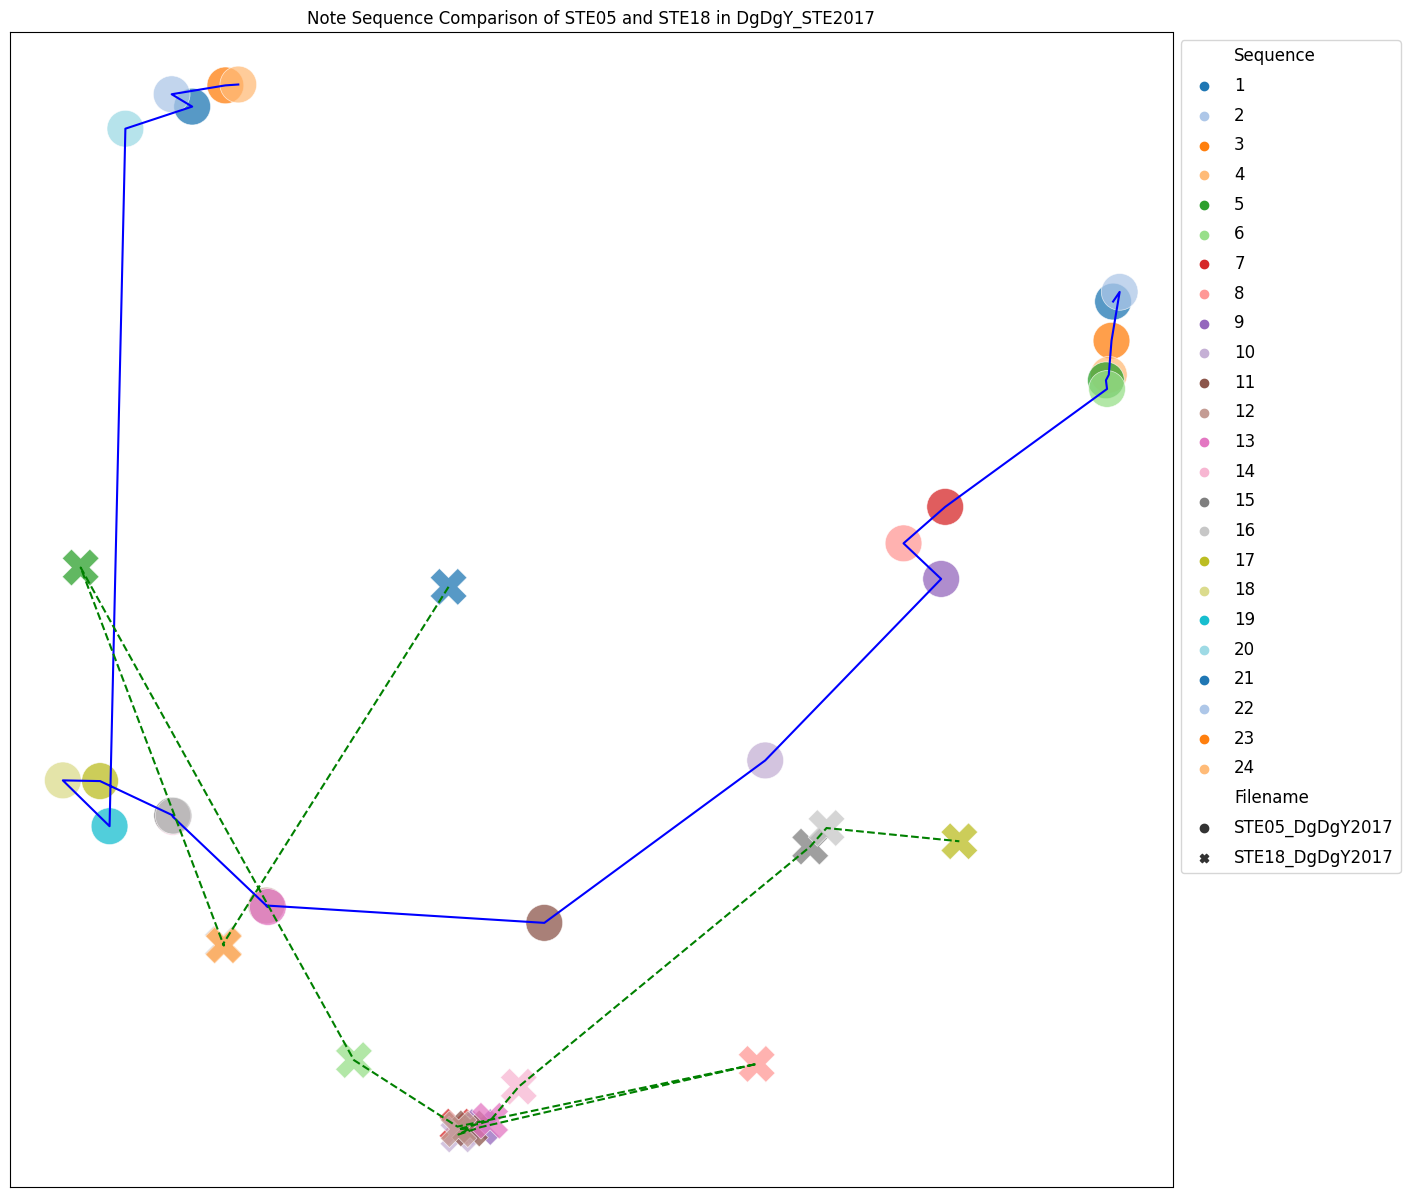

In [10]:
title = f"Note Sequence Comparison of STE05 and STE18 in {folder}"

by = ['sequence']
ascending = [True]

songtype.sort_values(
    ascending=ascending,
    by=by,
    inplace=True
)

figsize = (15, 15)
plt.figure(figsize=figsize)

ax = sns.scatterplot(
    songtype, 
    x='umap_x_2d', 
    y='umap_y_2d',
    hue='sequence',
    style='filename',
    alpha=0.75,
    legend='full',
    linewidth=0.5,
    palette='tab20',
    s=700
)

sns.move_legend(
    ax, 
    'upper left', 
    bbox_to_anchor=(1, 1),
    labelspacing=0.7,
    prop={
        'size': 'large'
    }
)

for text in ax.get_legend().get_texts():
    string = text.get_text()
    
    if 'sequence' in string or 'filename' in string:
        string = string.title()
        text.set_text(string)

ax.set(
    title=title,
    xlabel=None, 
    ylabel=None,
    xticklabels=[],
    yticklabels=[]
)

ax.tick_params(
    bottom=False,
    left=False
)

plt.plot(
    songtype[songtype.filename == 'STE05_DgDgY2017'].umap_x_2d, 
    songtype[songtype.filename == 'STE05_DgDgY2017'].umap_y_2d, 
    'blue', 
    linestyle='-'
)

plt.plot(
    songtype[songtype.filename == 'STE18_DgDgY2017'].umap_x_2d, 
    songtype[songtype.filename == 'STE18_DgDgY2017'].umap_y_2d, 
    'green', 
    linestyle='--'
)

filename = f"{folder}_songtype_comparison_line_sequence.png"
path = PROJECTION.joinpath(filename)

plt.savefig(
    path,
    bbox_inches='tight',
    dpi=300,
    format='png'
)

In [11]:
songtype = individual[individual.filename == 'STE05_DgDgY2017']
songtype.reset_index(inplace=True)
songtype = songtype.copy()

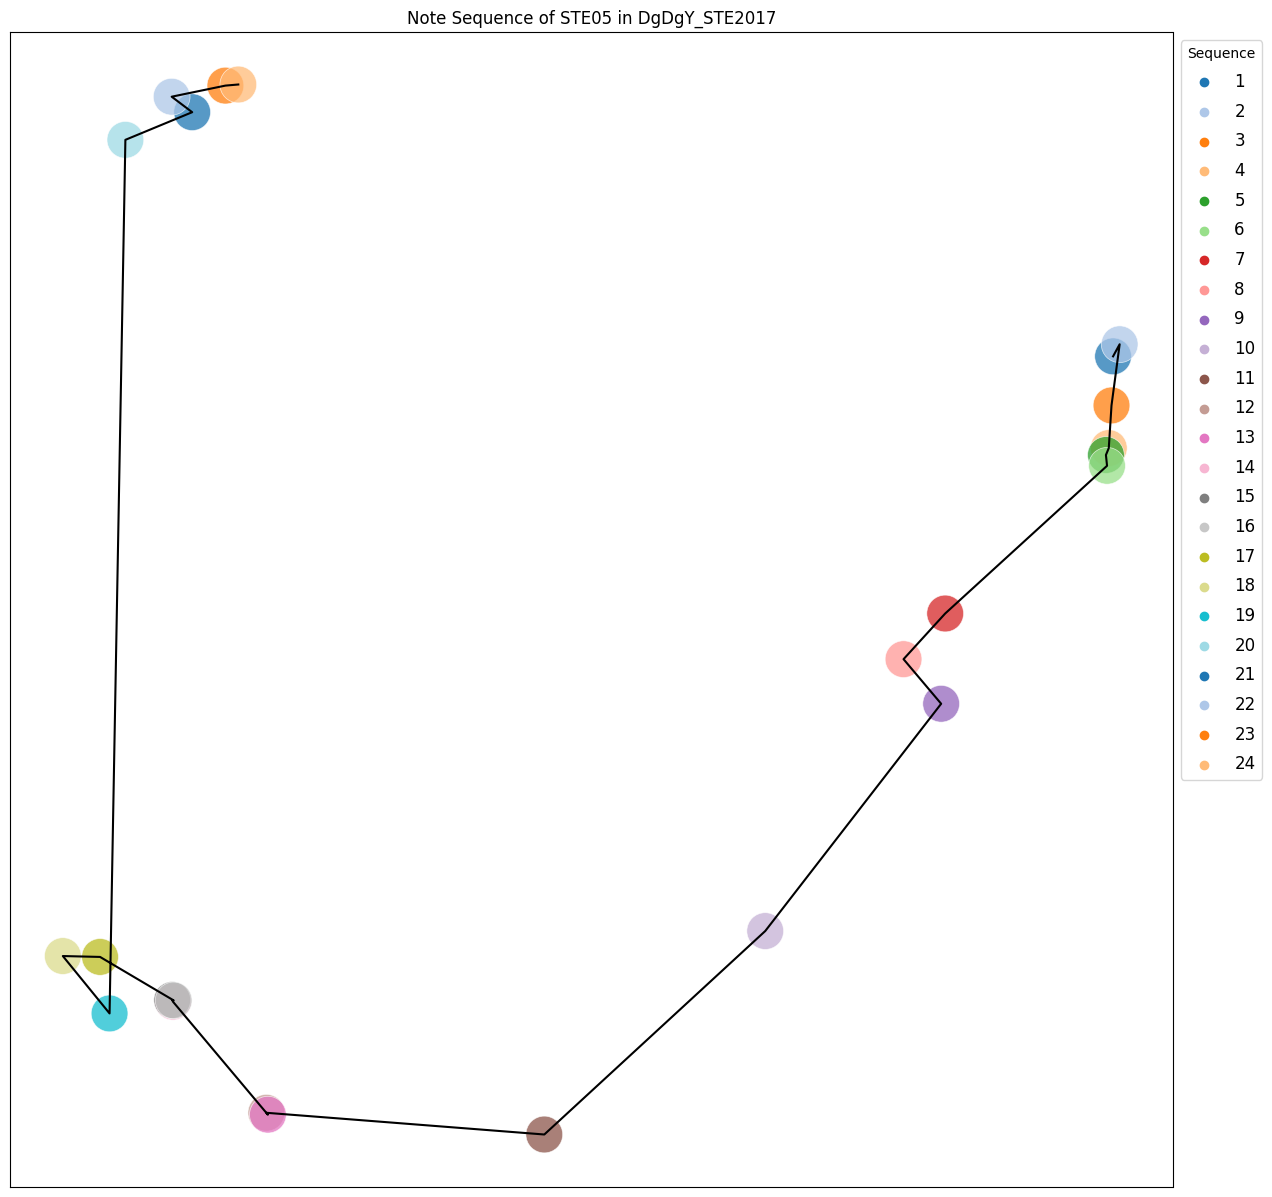

In [12]:
title = f"Note Sequence of STE05 in {folder}"

by = ['sequence']
ascending = [True]

songtype.sort_values(
    ascending=ascending,
    by=by,
    inplace=True
)

figsize = (15, 15)
plt.figure(figsize=figsize)

ax = sns.scatterplot(
    songtype, 
    x='umap_x_2d', 
    y='umap_y_2d',
    hue='sequence',
    alpha=0.75,
    legend='full',
    linewidth=0.5,
    palette='tab20',
    s=700
)

sns.move_legend(
    ax, 
    'upper left', 
    bbox_to_anchor=(1, 1),
    labelspacing=0.7,
    prop={
        'size': 'large'
    }
)

ax.get_legend().set_title('Sequence')

ax.set(
    title=title,
    xlabel=None, 
    ylabel=None,
    xticklabels=[],
    yticklabels=[]
)

ax.tick_params(
    bottom=False,
    left=False
)

plt.plot(
    songtype.umap_x_2d, 
    songtype.umap_y_2d, 
    'black', 
    linestyle='-'
)

filename = f"{folder}_ste05_sequence.png"
path = PROJECTION.joinpath(filename)

plt.savefig(
    path,
    bbox_inches='tight',
    dpi=300,
    format='png'
)

In [13]:
songtype = individual[individual.filename == 'STE18_DgDgY2017']
songtype.reset_index(inplace=True)
songtype = songtype.copy()

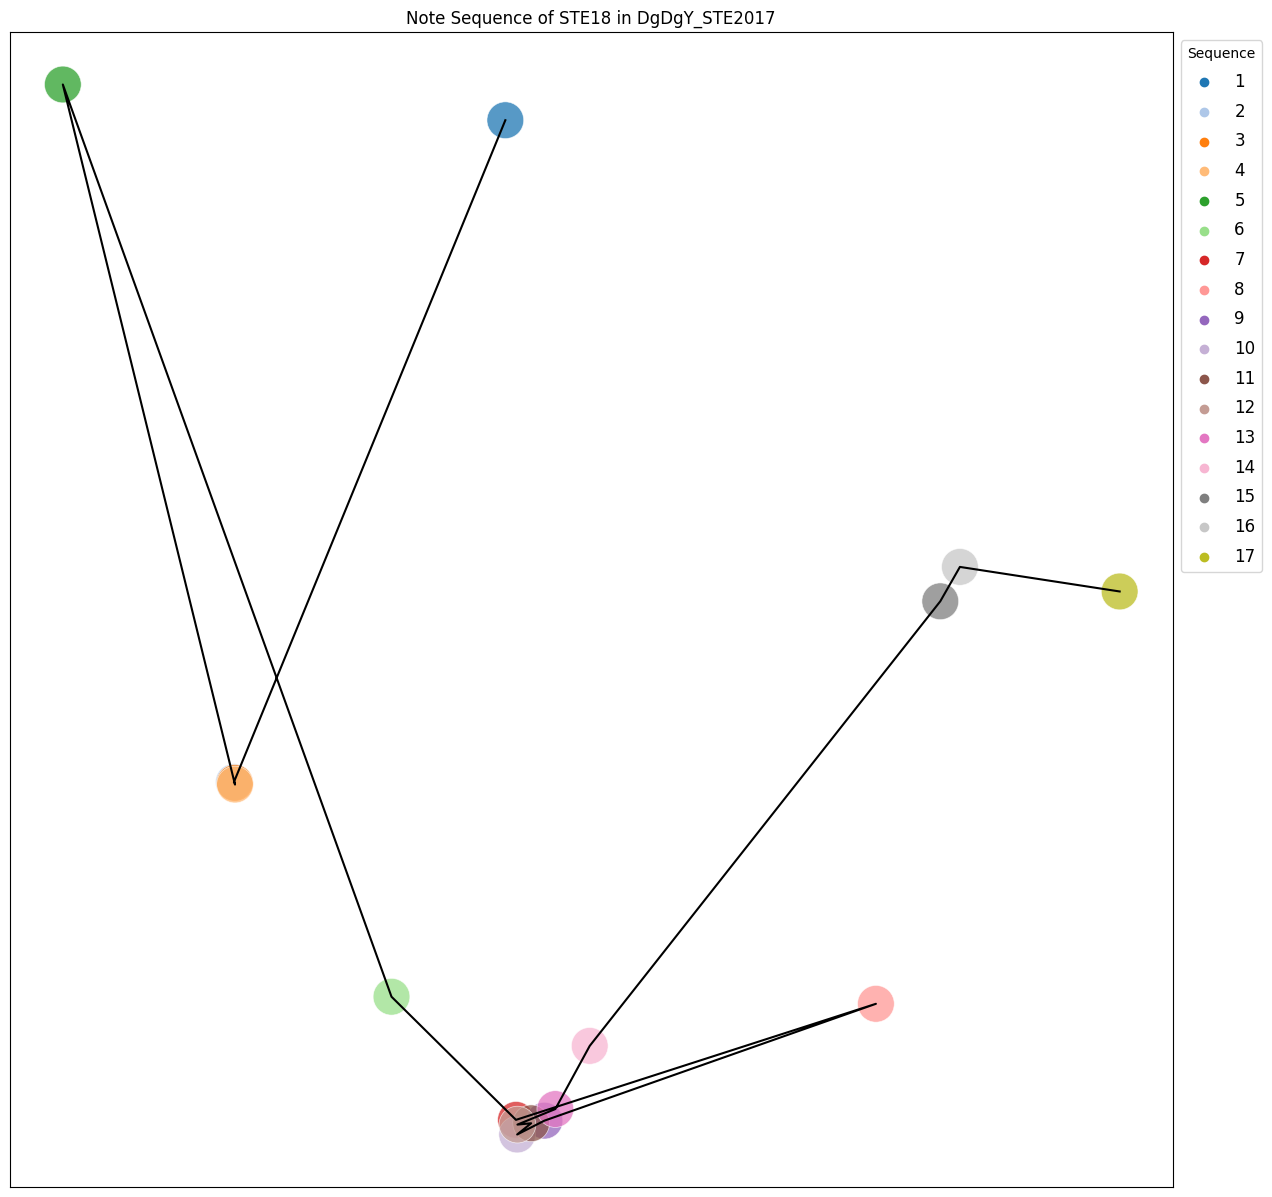

In [14]:
title = f"Note Sequence of STE18 in {folder}"

by = ['sequence']
ascending = [True]

songtype.sort_values(
    ascending=ascending,
    by=by,
    inplace=True
)

figsize = (15, 15)
plt.figure(figsize=figsize)

ax = sns.scatterplot(
    songtype, 
    x='umap_x_2d', 
    y='umap_y_2d',
    hue='sequence',
    alpha=0.75,
    legend='full',
    linewidth=0.5,
    palette='tab20',
    s=700
)

sns.move_legend(
    ax, 
    'upper left', 
    bbox_to_anchor=(1, 1),
    labelspacing=0.7,
    prop={
        'size': 'large'
    }
)

ax.get_legend().set_title('Sequence')

ax.set(
    title=title,
    xlabel=None, 
    ylabel=None,
    xticklabels=[],
    yticklabels=[]
)

ax.tick_params(
    bottom=False,
    left=False
)

plt.plot(
    songtype.umap_x_2d, 
    songtype.umap_y_2d, 
    'black', 
    linestyle='-'
)

filename = f"{folder}_ste18_sequence.png"
path = PROJECTION.joinpath(filename)

plt.savefig(
    path,
    bbox_inches='tight',
    dpi=300,
    format='png'
)